# Testing of basic numerical method

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy
plt.close('all')
from matplotlib import rcParams, cycler

In [2]:
# Function beta(a,t) : age specific fertility

def beta(x):
    return 2

In [3]:
# Function mu(a,t) : age specific mortality
    
def mu(x):
    return 3

In [4]:
# Initial population 

def p0(x):
    return np.power(10,5)*np.exp(-2*x)

In [5]:
# Parameters of the model

h = 1./3 # length time interval

A = 5
T = 3

M = int(A/h) # M+1 = number of data points
N = int(T/h)

In [6]:
# Discretization of time and age

t = np.linspace(0,T,N+1)
a = np.linspace(0,A,M+1)

Text(0, 0.5, 'Total population [10³ indiv.]')

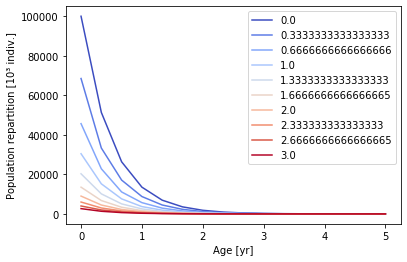

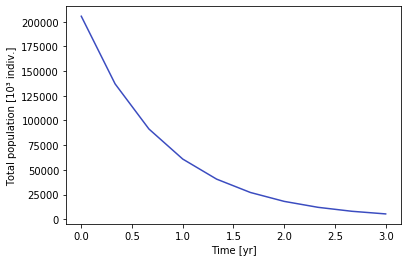

In [7]:
P = np.zeros((M+1,N+1))
women = np.zeros((N+1,1))
P_tot = np.zeros((N+1,1))

P[:,0] = p0(a) # initial population repartition

# Numerical scheme

fig = plt.figure()
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N+1)))
plt.plot(a, P[:,0], label=t[0])
P_tot[0] = np.sum(P[:,0])

for n in range(0,N): # loop on time
    
    for i in range(0,M): # loop on age
        P[i+1,n+1] = P[i,n]*( ( (2 - h*mu(a[i]+h/2)) / (2 + h*mu(a[i]+h/2) ))) 
        
        # Boundary condition
        sum_init = 0
        for i in range(1,M):
            sum_init += beta(a[i])*P[i,n+1]
        P[0,n+1] = (2*h*sum_init + h*beta(a[M])*P[M,n+1]) / (2 - h*beta(a[0]))
   
        P_zero = np.where((a>=15)&(a<=50), P[:,n+1], 0)
        women[n+1] = np.sum(P_zero)
        P_tot[n+1] = np.sum(P[:,n+1])
    
    plt.plot(a, P[:,n+1], label=t[n+1])
    
plt.xlabel('Age [yr]')
plt.ylabel('Population repartition [10³ indiv.]')
plt.legend(loc ='upper right') # upper right

fig3 = plt.figure()
plt.plot(t, P_tot)
plt.xlabel('Time [yr]')
plt.ylabel('Total population [10³ indiv.]')

## Analytical solution

In [8]:
def p(x,t):
    return np.power(10,5)*np.exp(-2*x-t)

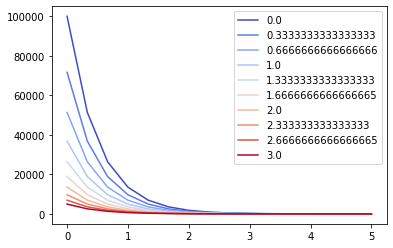

In [9]:
P_true = np.zeros((M+1,N+1))

for n in range(0,N+1):
    P_true[:,n] = p(a,t[n])

fig = plt.figure()
for n in range(0,N+1):
    plt.plot(a, P_true[:,n], label=t[n])

plt.legend(loc ='upper right') # upper right

## Error 

In [10]:
# Parameters of the model

hv = [1.7/3, 1.2/3, 1.0/3, 0.75/3, 0.5/3, 0.1/3, 0.05/3] # length time interval [years]
Err = np.zeros((len(hv), 1))
index = np.zeros((len(hv), 1))

for k in range(0,len(hv)):
    
    h = hv[k]
    
    A = 5
    T = 12

    M = int(A/h) # M+1 = number of data points
    N = int(T/h)

    # Discretization of time and age

    t = np.linspace(0,T,N+1)
    a = np.linspace(0,A,M+1)
    
    P_true = np.zeros((M+1,N+1)) # Exact solution

    for n in range(0,N+1):
        P_true[:,n] = p(a,t[n])

    P = np.zeros((M+1,N+1))
    women = np.zeros((N+1,1))
    P_tot = np.zeros((N+1,1))

    P[:,0] = p0(a) # initial population repartition

    # Numerical scheme

    P_tot[0] = np.sum(P[:,0])

    for n in range(0,N): # loop on time
    
        for i in range(0,M): # loop on age
            P[i+1,n+1] = P[i,n]*( ( (2 - h*mu(a[i]+h/2)) / (2 + h*mu(a[i]+h/2) ))) 
        
        # Boundary condition
        sum_init = 0
        for i in range(1,M):
            sum_init += beta(a[i])*P[i,n+1]
        P[0,n+1] = (2*h*sum_init + h*beta(a[M])*P[M,n+1]) / (2 - h*beta(a[0]))
   
        P_tot[n+1] = np.sum(P[:,n+1])
    
    time_step=18
    diff = abs(P[:,time_step]-P_true[:,time_step])/abs(P_true[:,time_step])
    Err[k] = max(diff)
    index[k] = np.argmax(diff)

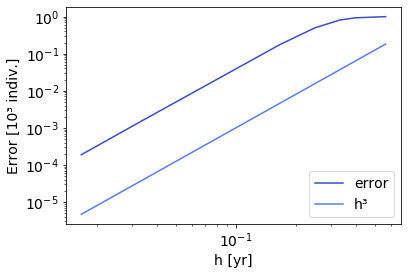

In [13]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

fig = plt.figure()
plt.loglog(hv, Err, label='error')
plt.loglog(hv, np.power(hv,3), label='h³')
plt.xlabel('h [yr]')
plt.ylabel('Error [10³ indiv.]')
plt.legend(loc ='lower right')

In [14]:
fig.savefig('outputs/report/error_convergence.eps', dpi=100, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
